<a href="https://colab.research.google.com/github/Soares-remootFR/modelo_churn/blob/main/modelo_churn_soares_remoot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




---
#**Modelo de Classificção *Churn***

---




##1. **Entendimento do Negócio (Business Understanding)**:
####    - Nosso objetivo é prever se um cliente vai cancelar o serviço (churn) ou permanecer.


##2. **Entendimento dos Dados (Data Understanding)**:
####    - Carregamos os dados de churn do arquivo Excel fornecido.
####    - Exibimos as primeiras linhas dos dados e calculamos estatísticas resumidas.
####    - Verificamos a presença de valores ausentes.


##3. **Preparação dos Dados (Data Preparation)**:
####    - Agregamos os dados por status de churn.
####    - Visualizamos a distribuição de churn com um gráfico de barras.
####    - Agregamos os dados por método de pagamento.
####    - Visualizamos a distribuição dos métodos de pagamento com outro gráfico de barras.
####    - Agregamos os dados por gênero.
####    - Codificamos a variável alvo (Churn) usando `LabelEncoder`.
####    - Preparamos as features (x) e o target (y).
####    - Aplicamos one-hot encoding nas features categóricas.
####    - Escalamos as features usando `MinMaxScaler`.
####    - Dividimos os dados em conjuntos de treinamento e teste.


##4. **Modelagem (Modeling)**:
####    - Treinamos um modelo de regressão logística.


##5. **Avaliação (Evaluation)**:
####    - Fazemos previsões no conjunto de teste.
####    - Criamos uma matriz de confusão para avaliar o desempenho do modelo.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
churn = pd.read_excel("churn_data.xlsx")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
churn.isna().count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [7]:
churn_agg = churn.groupby("Churn")["customerID"].count().reset_index()
churn_agg

,Churn,customerID
0,No,5163
1,Yes,1869


<ipython-input-8-82c6ef846aa3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= churn_agg, x="Churn", y="customerID", palette=colors);


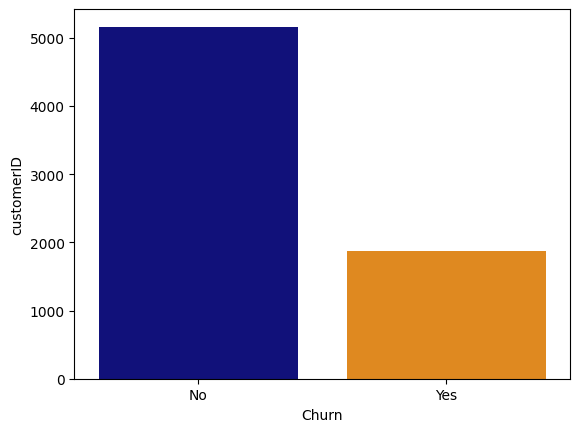

In [8]:
colors = ["darkblue", "darkorange"]
sns.barplot(data= churn_agg, x="Churn", y="customerID", palette=colors);

In [9]:
churn_payment = churn.groupby("PaymentMethod")["customerID"].count().reset_index()
churn_payment = pd.DataFrame(churn_payment)
churn_payment

,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


<ipython-input-10-d3a4ef28bfe8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= churn_payment, x= "PaymentMethod", y= "customerID", palette=colors);


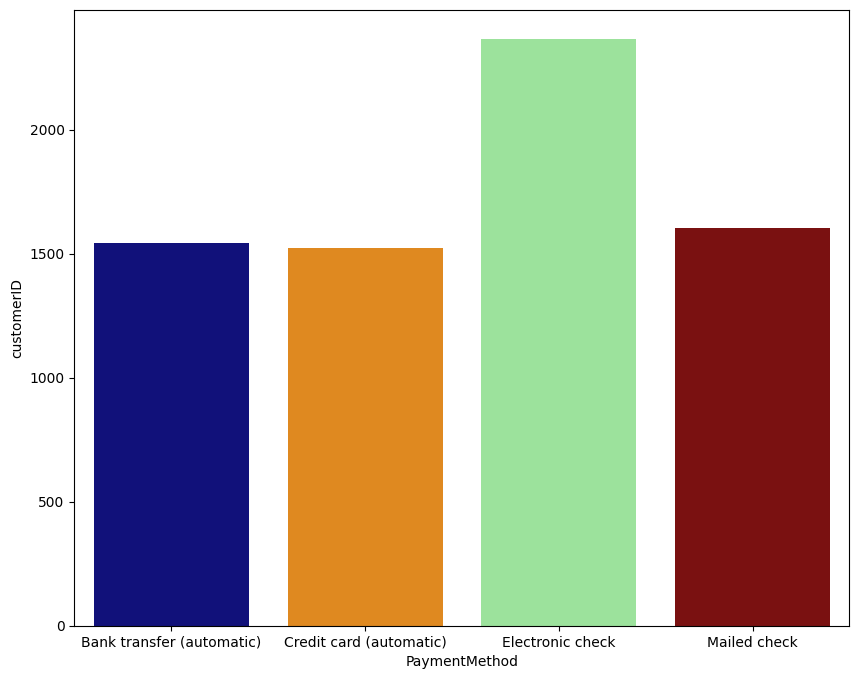

In [10]:
colors = ["darkblue", "darkorange", "lightgreen", "darkred"]
plt.figure(figsize=[10,8])
sns.barplot(data= churn_payment, x= "PaymentMethod", y= "customerID", palette=colors);

In [11]:
churn_gender = churn.groupby("gender")["customerID"].count().reset_index()
churn_gender = pd.DataFrame(churn_gender)
churn_gender

,gender,customerID
0,Female,3483
1,Male,3549


In [12]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
x = churn.drop(columns=["customerID", "Churn"], axis=1)
y = churn[["Churn"]]

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

<ipython-input-14-13e76a6936b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churn = le.transform(y.Churn)


In [15]:
x = pd.get_dummies(x)

In [16]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x = pd.DataFrame(mm.fit_transform(x))

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
lr.predict(x_test)

array([1, 1, 0, ..., 1, 0, 0])

In [20]:
x_test.assign(churn=y_test).assign(label=lr.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
5619,0.0,0.169014,0.780100,0.141438,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
4246,0.0,0.295775,0.701493,0.215365,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
6644,0.0,0.380282,0.114428,0.089072,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
5961,0.0,0.056338,0.705473,0.045517,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
16,0.0,0.718310,0.023881,0.115872,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,0.0,0.281690,0.551741,0.177694,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
5954,0.0,0.295775,0.600995,0.189817,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
4131,0.0,0.000000,0.668657,0.007691,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
209,0.0,0.887324,0.837811,0.765670,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0


Matriz de Confusão:
[[1149  146]
 [ 202  261]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1295
           1       0.64      0.56      0.60       463

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.73      1758
weighted avg       0.80      0.80      0.80      1758



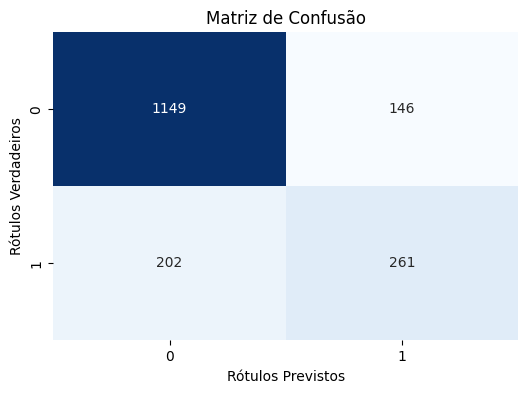

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = lr.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")
print(conf_matrix)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Matriz de Confusão")
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (treino): {accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia (teste): {accuracy_score(y_test, lr.predict(x_test))}")

print(f"Acurácia Balanceada (treino): {balanced_accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia Balanceada (teste): {balanced_accuracy_score(y_test, lr.predict(x_test))}")

print(f"Precisão (treino): {precision_score(y_train, lr.predict(x_train))}")
print(f"Precisão (teste): {precision_score(y_test, lr.predict(x_test))}")

print(f"Recall (treino): {recall_score(y_train, lr.predict(x_train))}")
print(f"Recall (teste): {recall_score(y_test, lr.predict(x_test))}")

print(f"F1 (treino): {f1_score(y_train, lr.predict(x_train))}")
print(f"F1 (teste): {f1_score(y_test, lr.predict(x_test))}")

print(f"Roc (treino): {roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])}")
print(f"Roc (teste): {roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])}")

Acurácia (treino): 0.8020477815699659
Acurácia (teste): 0.8020477815699659
Acurácia Balanceada (treino): 0.7215387297164906
Acurácia Balanceada (teste): 0.7254867950332313
Precisão (treino): 0.6531302876480541
Precisão (teste): 0.6412776412776413
Recall (treino): 0.5490753911806543
Recall (teste): 0.5637149028077754
F1 (treino): 0.5965996908809891
F1 (teste): 0.6000000000000001
Roc (treino): 0.8499390814370676
Roc (teste): 0.8363826646764011


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


In [24]:
rf.fit(x_train, y_train)

<ipython-input-24-fc0aeedd5571>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [25]:
rf.predict(x_test)

array([1, 1, 0, ..., 1, 0, 0])

In [26]:
x_test.assign(churn= y_test).assign(label= rf.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
5619,0.0,0.169014,0.780100,0.141438,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
4246,0.0,0.295775,0.701493,0.215365,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
6644,0.0,0.380282,0.114428,0.089072,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
5961,0.0,0.056338,0.705473,0.045517,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
16,0.0,0.718310,0.023881,0.115872,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,0.0,0.281690,0.551741,0.177694,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
5954,0.0,0.295775,0.600995,0.189817,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
4131,0.0,0.000000,0.668657,0.007691,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
209,0.0,0.887324,0.837811,0.765670,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0


Matriz de Confusão:
[[1141  154]
 [ 233  230]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1295
           1       0.60      0.50      0.54       463

    accuracy                           0.78      1758
   macro avg       0.71      0.69      0.70      1758
weighted avg       0.77      0.78      0.77      1758



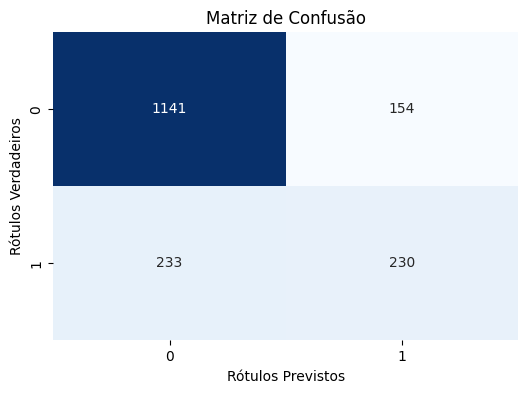

In [27]:
y_pred = rf.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")
print(conf_matrix)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Matriz de Confusão")
plt.show()

In [28]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (treino): {accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia (teste): {accuracy_score(y_test, rf.predict(x_test))}")

print(f"Acurácia Balanceada (treino): {balanced_accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia Balanceada (teste): {balanced_accuracy_score(y_test, rf.predict(x_test))}")

print(f"Precisão (treino): {precision_score(y_train, rf.predict(x_train))}")
print(f"Precisão (teste): {precision_score(y_test, rf.predict(x_test))}")

print(f"Recall (treino): {recall_score(y_train, rf.predict(x_train))}")
print(f"Recall (teste): {recall_score(y_test, rf.predict(x_test))}")

print(f"F1 (treino): {f1_score(y_train, rf.predict(x_train))}")
print(f"F1 (teste): {f1_score(y_test, rf.predict(x_test))}")

print(f"Roc (treino): {roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])}")
print(f"Roc (teste): {roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])}")

Acurácia (treino): 0.9979142965491088
Acurácia (teste): 0.7798634812286689
Acurácia Balanceada (treino): 0.9976726645003464
Acurácia Balanceada (teste): 0.6889206701301733
Precisão (treino): 0.9950319375443577
Precisão (teste): 0.5989583333333334
Recall (treino): 0.9971550497866287
Recall (teste): 0.49676025917926564
F1 (treino): 0.9960923623445825
F1 (teste): 0.5430932703659976
Roc (treino): 0.9999134857112597
Roc (teste): 0.8234512204274622


In [29]:
from seaborn.axisgrid import Grid
from sklearn.model_selection import GridSearchCV

parameters = {
                "max_depth": [1,2,3,4,5,6,7,8,9,10],
              "n_estimators": [100,300,500]
}

grid_search = GridSearchCV(rf, parameters, scoring="accuracy", cv=5,n_jobs=-1)


In [30]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [31]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
rf_tunned = RandomForestClassifier(
bootstrap = True,
ccp_alpha = 0.0,
class_weight = None,
criterion ='gini',
max_depth = 9,
max_features = 'sqrt',
max_leaf_nodes = None,
max_samples = None,
min_impurity_decrease = 0.0,
min_samples_leaf = 1,
min_samples_split = 2,
min_weight_fraction_leaf = 0.0,
n_estimators = 500,
n_jobs = None,
oob_score = False,
random_state = None,
verbose = 0,
warm_start = False)

rf_tunned

RandomForestClassifier(max_depth=9, n_estimators=500)

In [33]:
rf_tunned.fit(x_train, y_train)



<ipython-input-33-dd7f15cf9139>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(x_train, y_train)


RandomForestClassifier(max_depth=9, n_estimators=500)

In [34]:
rf_tunned.fit(x_train, y_train)

<ipython-input-34-c688d1ebe8d8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(x_train, y_train)


RandomForestClassifier(max_depth=9, n_estimators=500)

In [35]:
rf_tunned.predict(x_test)

array([1, 1, 0, ..., 1, 0, 0])

In [36]:
x_test.assign(churn=y_test).assign(label=rf_tunned.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
5619,0.0,0.169014,0.780100,0.141438,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
4246,0.0,0.295775,0.701493,0.215365,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
6644,0.0,0.380282,0.114428,0.089072,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
5961,0.0,0.056338,0.705473,0.045517,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
16,0.0,0.718310,0.023881,0.115872,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,0.0,0.281690,0.551741,0.177694,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
5954,0.0,0.295775,0.600995,0.189817,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
4131,0.0,0.000000,0.668657,0.007691,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
209,0.0,0.887324,0.837811,0.765670,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0


Matriz de Confusão:
[[1167  128]
 [ 219  244]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1295
           1       0.66      0.53      0.58       463

    accuracy                           0.80      1758
   macro avg       0.75      0.71      0.73      1758
weighted avg       0.79      0.80      0.80      1758



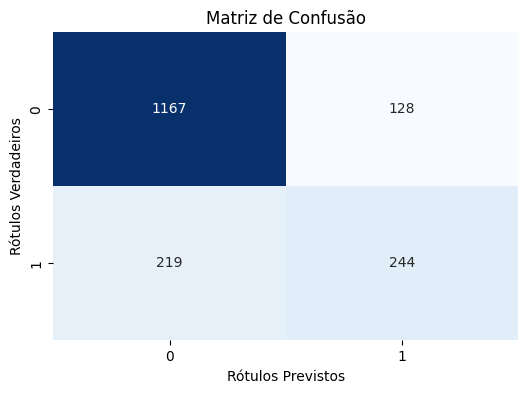

In [37]:
y_pred = rf_tunned.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")
print(conf_matrix)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Matriz de Confusão")
plt.show()

In [38]:
print(f"Acurácia (treino): {accuracy_score(y_train, rf_tunned.predict(x_train))}")
print(f"Acurácia (teste): {accuracy_score(y_test, rf_tunned.predict(x_test))}")

print(f"Acurácia Balanceada (treino): {balanced_accuracy_score(y_train, rf_tunned.predict(x_train))}")
print(f"Acurácia Balanceada (teste): {balanced_accuracy_score(y_test, rf_tunned.predict(x_test))}")

print(f"Precisão (treino): {precision_score(y_train, rf_tunned.predict(x_train))}")
print(f"Precisão (teste): {precision_score(y_test, rf_tunned.predict(x_test))}")

print(f"Recall (treino): {recall_score(y_train, rf_tunned.predict(x_train))}")
print(f"Recall (teste): {recall_score(y_test, rf_tunned.predict(x_test))}")

print(f"F1 (treino): {f1_score(y_train, rf_tunned.predict(x_train))}")
print(f"F1 (teste): {f1_score(y_test, rf_tunned.predict(x_test))}")

print(f"Roc (treino): {roc_auc_score(y_train, rf_tunned.predict_proba(x_train)[:,1])}")
print(f"Roc (teste): {roc_auc_score(y_test, rf_tunned.predict_proba(x_test)[:,1])}")

Acurácia (treino): 0.8503981797497155
Acurácia (teste): 0.8026166097838453
Acurácia Balanceada (treino): 0.7809848029055562
Acurácia Balanceada (teste): 0.7140780706655436
Precisão (treino): 0.7657192075796727
Precisão (teste): 0.6559139784946236
Recall (treino): 0.6322901849217639
Recall (teste): 0.5269978401727862
F1 (treino): 0.6926373198285937
F1 (teste): 0.5844311377245509
Roc (treino): 0.9320633906098991
Roc (teste): 0.8409875163654861
